In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
from tqdm import tqdm

In [4]:
PROJECT_ROOT_PATH = Path('.').resolve().parent.parent
RAW_DATA_PATH = PROJECT_ROOT_PATH/'data/raw_data'

In [5]:
train_query = pd.read_csv(RAW_DATA_PATH/'./train/train.query.tsv',sep='\t',header=None)
train_query.columns=['id','q1']
train_reply = pd.read_csv(RAW_DATA_PATH/'./train/train.reply.tsv',sep='\t',header=None)
train_reply.columns=['id','id_sub','q2','label']
train_df = train_query.merge(train_reply, how='left')
# train_df['q2'] = df_train['q2'].fillna('好的')
test_query = pd.read_csv(RAW_DATA_PATH/'./test/test.query.tsv',sep='\t',header=None, encoding='gbk')
test_query.columns = ['id','q1']
test_reply =  pd.read_csv(RAW_DATA_PATH/'./test/test.reply.tsv',sep='\t',header=None, encoding='gbk')
test_reply.columns=['id','id_sub','q2']
test_df = test_query.merge(test_reply, how='left')

In [6]:
train_query.head()

,id,q1
0,0,采荷一小是分校吧
1,1,毛坯吗？
2,2,你们的佣金费大约是多少和契税是多少。
3,3,靠近川沙路嘛？
4,4,这套房源价格还有优惠空间吗？


In [7]:
train_df.head()

,id,q1,id_sub,q2,label
0,0,采荷一小是分校吧,0,杭州市采荷第一小学钱江苑校区，杭州市钱江新城实验学校。,1
1,0,采荷一小是分校吧,1,是的,0
2,0,采荷一小是分校吧,2,这是5楼,0
3,1,毛坯吗？,0,因为公积金贷款贷的少,0
4,1,毛坯吗？,1,是呢,0


In [8]:
print(f'训练集问题数量：{len(train_query)}，答案数量：{len(train_reply)}')
print(f'测试集问题数量：{len(test_query)}，答案数量：{len(test_reply)}')

训练集问题数量：6000，答案数量：21585
测试集问题数量：14000，答案数量：53757


In [9]:
q_length = train_query['q1'].apply(func=lambda x: len(x)).sort_values()
a_length = train_reply['q2'].apply(func=lambda x: len(str(x))).sort_values()

#question: 6000, #answer: 21585
问题和回答的长度分布：


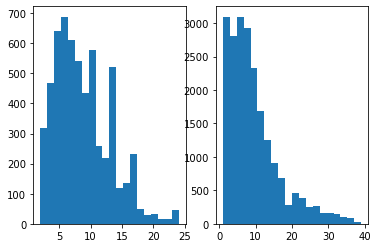

In [10]:
print(f'#question: {len(train_query)}, #answer: {len(train_reply)}')
print('问题和回答的长度分布：')
plt.subplot(121)
plt.hist(q_length[:-50], bins=20)
plt.subplot(122)
plt.hist(a_length.sort_values()[:-500], bins=20)
plt.show()

In [12]:
answers = train_df[train_df['id'] == 100]
answers

,id,q1,id_sub,q2,label
355,100,带家具家电？,0,育文分校和魅力小学,0
356,100,带家具家电？,1,育文已经正式下文了,0
357,100,带家具家电？,2,已经在招生，咱想考虑那的房子我可以给您推荐几个好房子,0


In [ ]:
answers['label']

In [25]:
pos_ratioes = {id: [0, 0] for id in train_query['id']}
for row in tqdm(train_df.itertuples()):
    pos_ratioes[row.id][row.label] += 1
for k, v in pos_ratioes.items():
    pos_ratioes[k] = v[1] / sum(v)

21585it [00:00, 485856.70it/s]


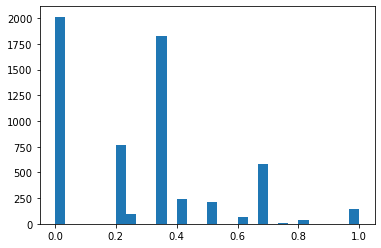

In [28]:
plt.hist(pos_ratioes.values(), bins=30)
plt.show()